In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array, array_to_img
%matplotlib inline
plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')



/Users/mbun/Code/dsi_galvanize/capstones/capstone_3/Dog-Years-Age-Classification/src


In [16]:
expert_ds_loc = '../../data/Expert_TrainEval'
petfinder_ds_loc = '../../data/PetFinder_All'

expert_senior_imgs = [fn for fn in os.listdir(f'{expert_ds_loc}/Senior') if fn.endswith('.jpg') or fn.endswith('.png')]
expert_adult_imgs = [fn for fn in os.listdir(f'{expert_ds_loc}/Adult') if fn.endswith('.jpg') or fn.endswith('.png')]
expert_young_imgs = [fn for fn in os.listdir(f'{expert_ds_loc}/Young') if fn.endswith('.jpg') or fn.endswith('.png')]

petfinder_senior_imgs = [fn for fn in os.listdir(f'{petfinder_ds_loc}/Senior') if fn.endswith('.jpg') or fn.endswith('.png')]
petfinder_adult_imgs = [fn for fn in os.listdir(f'{petfinder_ds_loc}/Adult') if fn.endswith('.jpg') or fn.endswith('.png')]
petfinder_young_imgs = [fn for fn in os.listdir(f'{petfinder_ds_loc}/Young') if fn.endswith('.jpg') or fn.endswith('.png')]

all_imgs = [expert_senior_imgs, expert_adult_imgs, expert_young_imgs, petfinder_senior_imgs, petfinder_adult_imgs, petfinder_young_imgs]

# [fn if fn.endswith('.jpg') or fn.endswith('.png') else print(fn) for fn in os.listdir(f'{petfinder_ds_loc}/Young')];


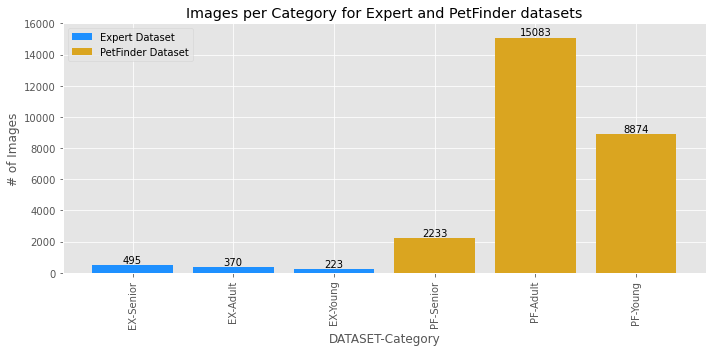

In [33]:
labels = ['EX-Senior', 'EX-Adult', 'EX-Young', 'PF-Senior', 'PF-Adult', 'PF-Young']
totals = [len(x) for x in all_imgs]

plt.figure(figsize=(10,5))
plt.bar(labels[:3], totals[:3], color='dodgerblue')
plt.bar(labels[3:], totals[3:], color='goldenrod')

for i, y in enumerate(totals):
    plt.text(i, y, y, ha='center', va='bottom')#, fontsize=14, fontweight='bold')

plt.title('Images per Category for Expert and PetFinder datasets')#, fontsize=20, fontweight='bold')
plt.ylim(0, 16000)
plt.xticks(rotation=90)#, fontsize=14, fontweight='bold')
plt.xlabel('DATASET-Category')
plt.ylabel('# of Images')
# plt.yticks(fontsize=14, fontweight='bold')
plt.legend(['Expert Dataset', 'PetFinder Dataset'], loc=2)
plt.tight_layout()
plt.savefig('../img/Images_per_Category.png')


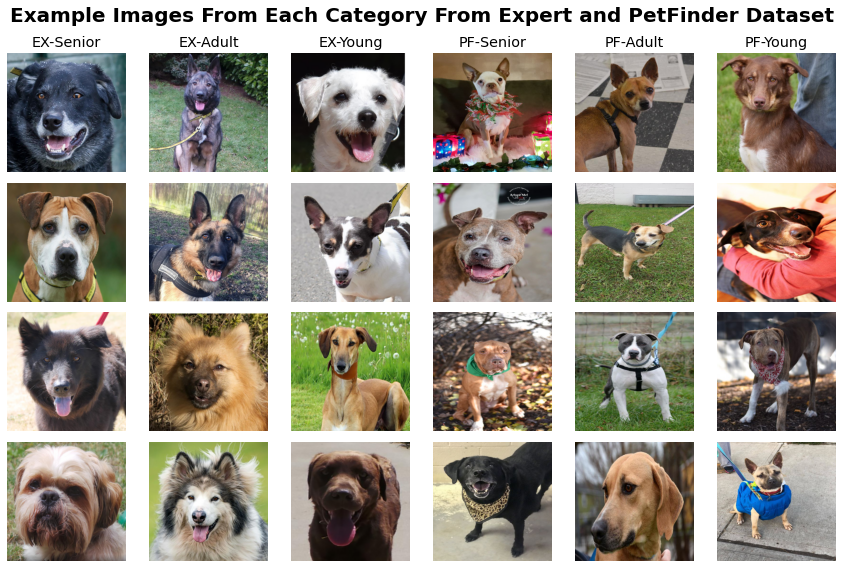

In [37]:
fig, ax = plt.subplots(4, 6, figsize=(12,8))
for i1, imgset in enumerate(all_imgs):
    lbl = labels[i1]
    lbl_ds, lbl_cat = lbl.split('-')
    # print(lbl_ds, lbl_cat)
    if lbl_ds == 'EX':
        fp = f'{expert_ds_loc}/{lbl_cat}/'
    else:
        fp = f'{petfinder_ds_loc}/{lbl_cat}/'
    select_4 = np.random.choice(imgset, 4, replace=False)
    ax[0][i1].set_title(lbl)
    for i2, img_select in enumerate(select_4):
        fp_img = fp + img_select
        # print(fp_img)
        fn = image.load_img(fp_img, target_size=(500,500))
        ax[i2][i1].imshow(fn)
        ax[i2][i1].axis('off')
fig.suptitle('Example Images From Each Category From Expert and PetFinder Dataset', fontsize=20, fontweight='bold')
fig.tight_layout()
# fig.savefig('../img/Example_Dogs.png')


In [99]:
for i1, imgset in enumerate(all_imgs[:3]):
    lbl = labels[i1]
    lbl_ds, lbl_cat = lbl.split('-')
    if lbl_ds == 'EX':
        fp = f'{expert_ds_loc}/{lbl_cat}/'
    else:
        fp = f'{petfinder_ds_loc}/{lbl_cat}/'
    
    for i2, img_select in enumerate(imgset):
        fp_img = fp + img_select
        fn = image.load_img(fp_img, target_size=(500,500), )



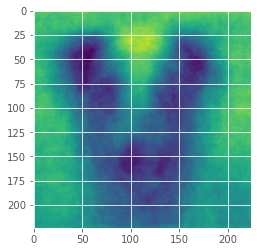

In [108]:
ex_adult = np.load('../data/expert_adult_224_G.npy')
ex_senior = np.load('../data/expert_senior_224_G.npy')
ex_young = np.load('../data/expert_young_224_G.npy')
plt.imshow(ex_adult.mean(axis=0).reshape(224,224))

In [105]:
def find_mean_img(full_mat, title, size = (224, 224)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0) * 1./255
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

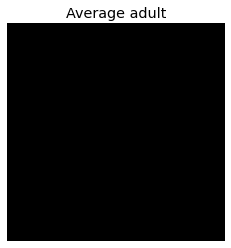

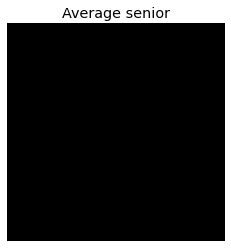

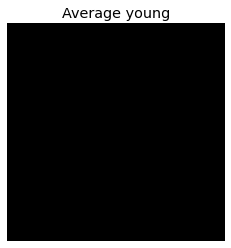

In [106]:
find_mean_img(ex_adult, 'adult') - find_mean_img(ex_senior, 'senior')
find_mean_img(ex_young, 'young');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


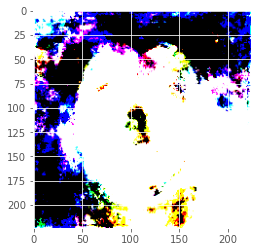

In [75]:
contrast_mean = (np.mean(ex_senior, axis = 0) - np.mean(ex_young, axis = 0)).reshape(224,224,3)
contrast_mean
plt.imshow(contrast_mean, cmap='bwr')
# plt.title(f'Difference Between Normal & Pneumonia Average')
# plt.axis('off')
# plt.show()(f'Difference Between Normal & Pneumonia Average')
# plt.axis('off')
# plt.show()

In [78]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (224, 224,3)):
    # fit PCA to describe n_comp * variability in the class
    full_mat = full_mat * 1./255
    pca = PCA(n_components = n_comp)#, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (224,224,3)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size))
    plt.axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Number of PC:  40
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for int

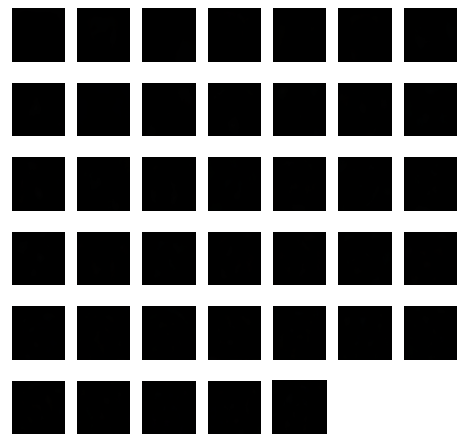

In [79]:
plot_pca(eigenimages(ex_adult, 'adult'))